In [1]:
# Notebook for processing raw data 
# Selects only triggers and releases

# Load data
import numpy as np
import matplotlib.pyplot as plt
from peratouch.config import data_dir
from peratouch.data import TriggersAndReleases

# Width of triggers 
width = 32 
path = data_dir / "raw_npz" / "three_users_data.npz"
data = np.load((path))


Signal shape: (899996,)
Excluded noisy triggers: (1220, 32)
Excluded short triggers: (1, 32)
Included clean triggers: (2258, 32)
Included clean releases: (2258, 32)


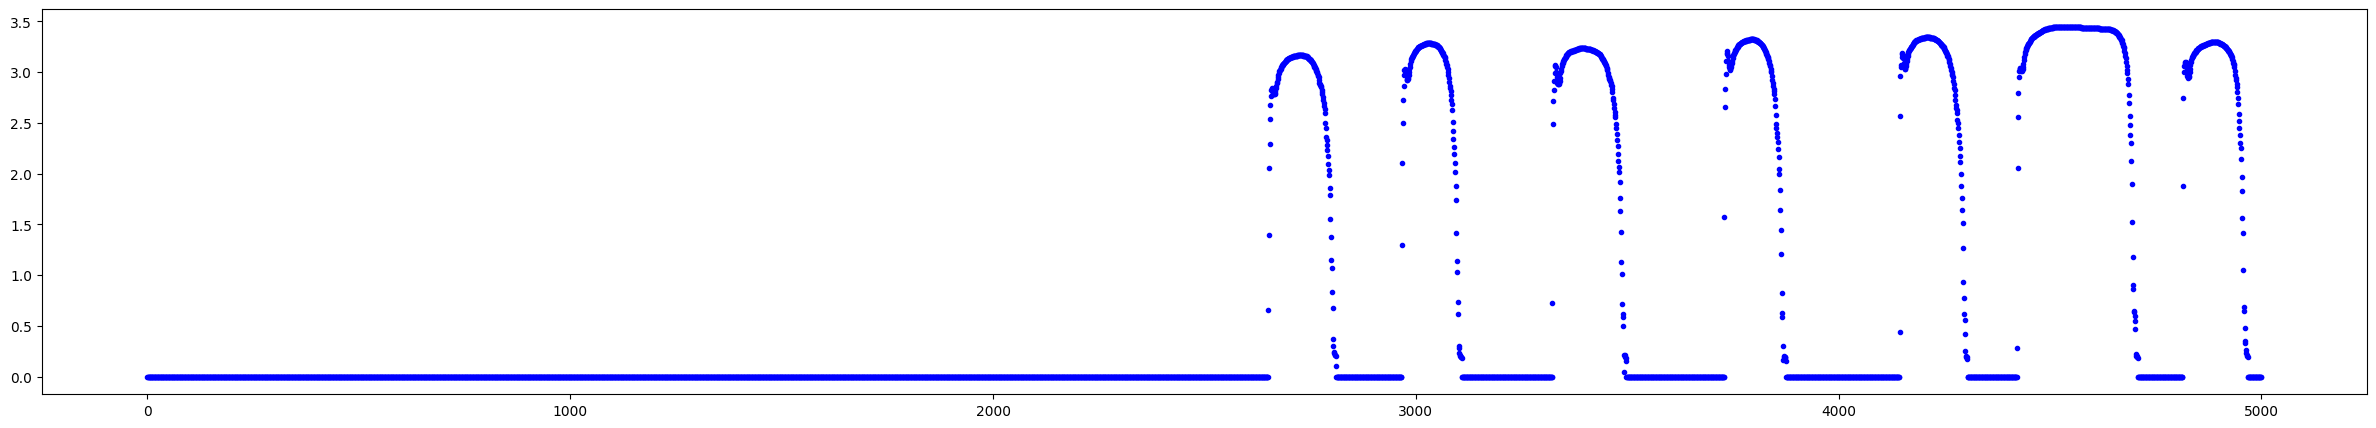

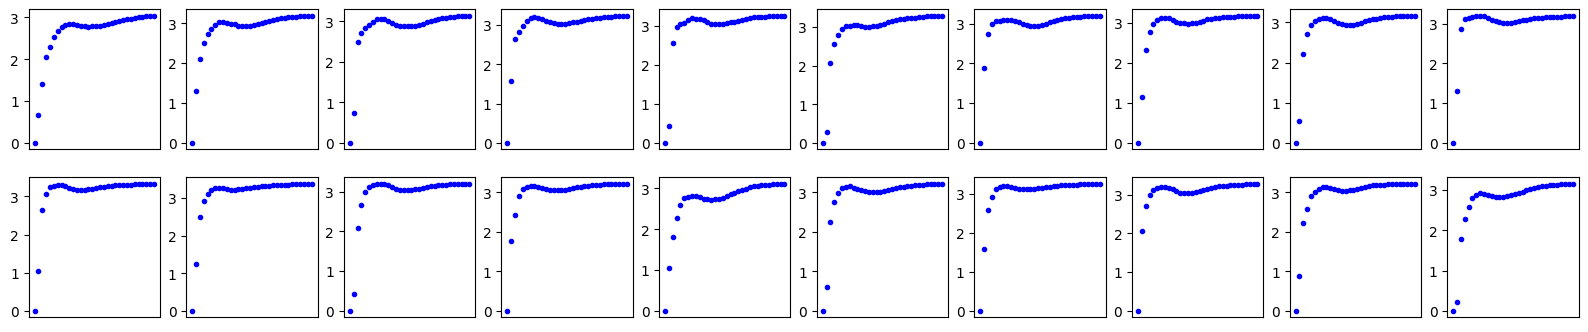

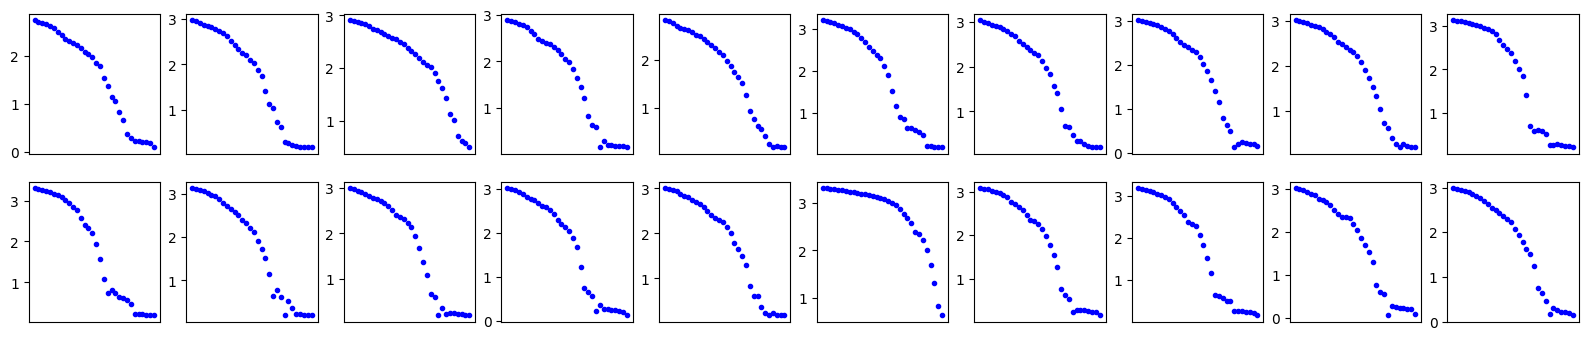

In [2]:
# Look at a few triggers of one of the users
key = list(data.keys())[0] 
signal = data[key]   # Only a few presses 

TR = TriggersAndReleases(signal)
TR.plot_signal()
TR.run()
TR.plot_clean()

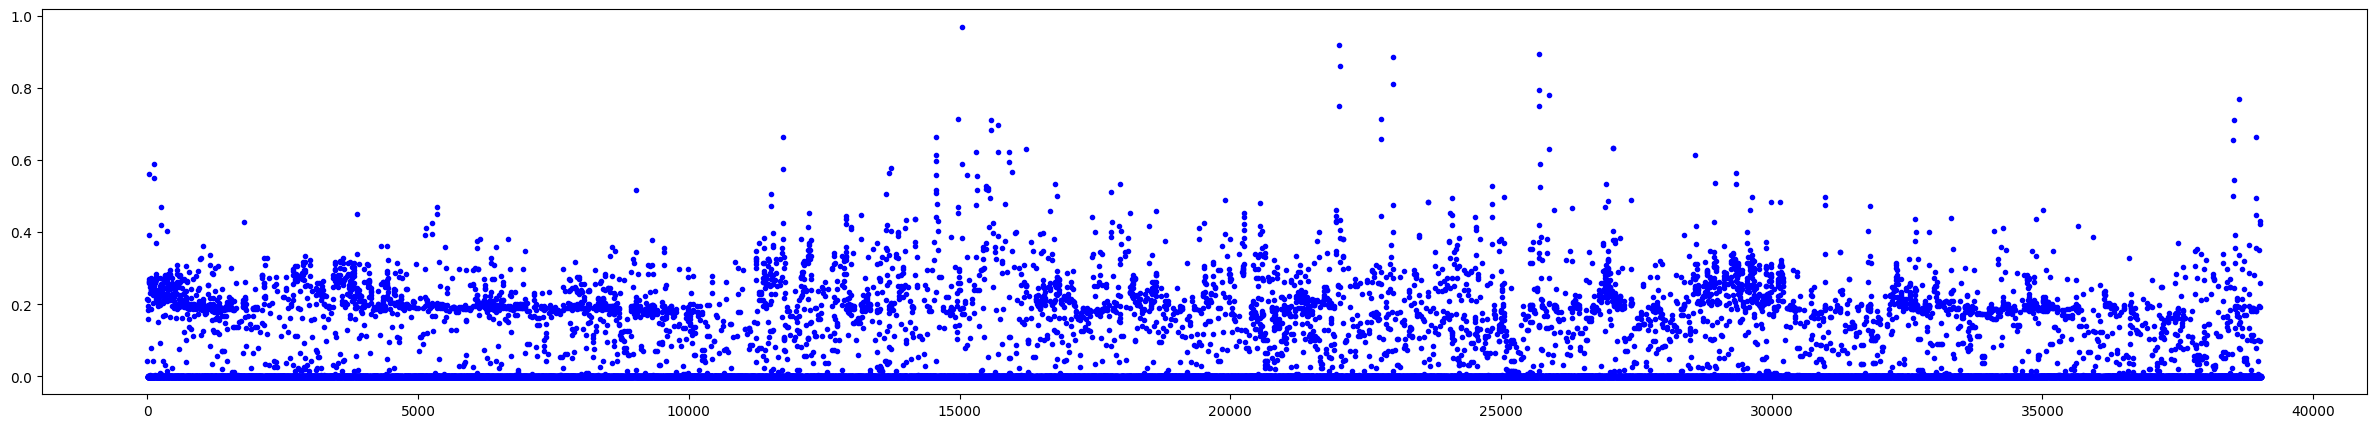

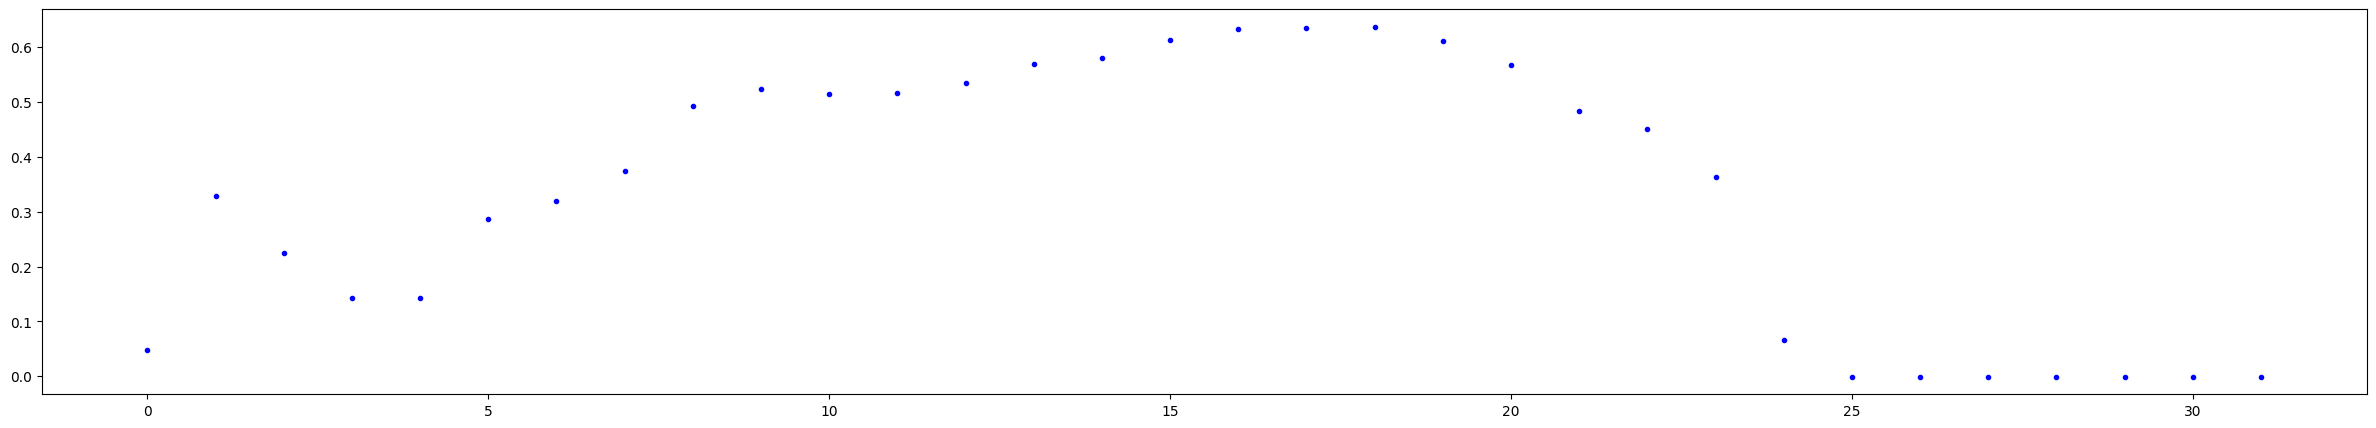

In [3]:
TR.plot_noisy()
TR.plot_short()


Signal shape: (899996,)
Excluded noisy triggers: (1220, 32)
Excluded short triggers: (1, 32)
Included clean triggers: (2258, 32)
Included clean releases: (2258, 32)

Signal shape: (899996,)
Excluded noisy triggers: (145, 32)
Excluded short triggers: (269, 32)
Included clean triggers: (2691, 32)
Included clean releases: (2691, 32)

Signal shape: (899996,)
Excluded noisy triggers: (661, 32)
Excluded short triggers: (18, 32)
Included clean triggers: (2548, 32)
Included clean releases: (2548, 32)


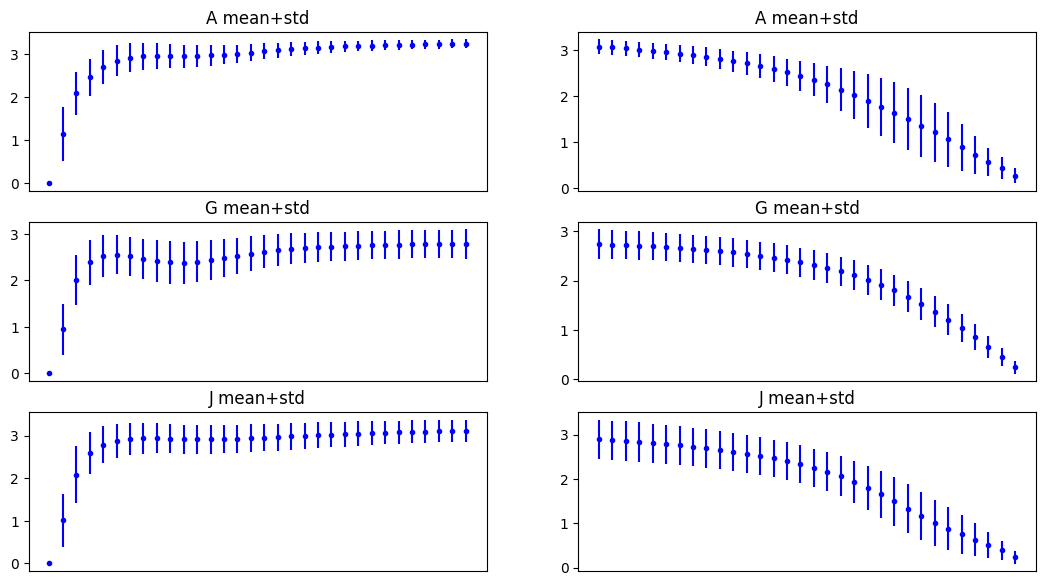

In [4]:
# Compare the mean and std of the signals for all the users involved
plt.figure(figsize=(13, 7))
n_users = len(data)
for i, key in enumerate(data):
    TR = TriggersAndReleases(data[key])
    TR.run()
    for j, sig in enumerate([TR.get_triggers(), TR.get_releases()]):
        plt.subplot(n_users, 2, 2*i+j+1)
        sigAvg = np.mean(sig, axis=0)
        sigStd = np.std(sig, axis=0)
        plt.title(key+" mean+std")
        plt.errorbar(np.arange(len(sigAvg)), sigAvg, sigStd, fmt="b.")
        plt.xticks([])

In [5]:
# Loop to build and save data 
# Only run if want to update saved file 
processedData = {}
for key in data:
    print(f"\nUser {key}:")
    TR = TriggersAndReleases(data[key])
    TR.run()

    processedData[key+"_triggers"] = TR.get_triggers()
    processedData[key+"_releases"] = TR.get_releases()

filename = path.name.split(".")[0] + "_window" + f"_{TR.get_triggers().shape[1]}.npz"
save_path = data_dir / "processed" / filename
np.savez(save_path, **processedData)
print("\n\n")
for k in processedData: print(f"Saved {k} : {processedData[k].shape}")


User A:

Signal shape: (899996,)
Excluded noisy triggers: (1220, 32)
Excluded short triggers: (1, 32)
Included clean triggers: (2258, 32)
Included clean releases: (2258, 32)

User G:

Signal shape: (899996,)
Excluded noisy triggers: (145, 32)
Excluded short triggers: (269, 32)
Included clean triggers: (2691, 32)
Included clean releases: (2691, 32)

User J:

Signal shape: (899996,)
Excluded noisy triggers: (661, 32)
Excluded short triggers: (18, 32)
Included clean triggers: (2548, 32)
Included clean releases: (2548, 32)



Saved A_triggers : (2258, 32)
Saved A_releases : (2258, 32)
Saved G_triggers : (2691, 32)
Saved G_releases : (2691, 32)
Saved J_triggers : (2548, 32)
Saved J_releases : (2548, 32)
